You’re tasked with optimising a four-variable black-box function that represents the yield of a chemical process in a factory. The function is typically unimodal, with a single peak where yield is maximised. 

Your goal is to find the optimal combination of chemical inputs that delivers the highest possible yield, using systematic exploration and optimisation methods.

In [2]:
import numpy as np
import pandas as pd

In [4]:
inputs_f5 = np.load('function_5/initial_inputs.npy')
outputs_f5 = np.load('function_5/initial_outputs.npy')

In [5]:
print("Inputs (Function 5):", inputs_f5)

Inputs (Function 5): [[0.19144708 0.03819337 0.60741781 0.41458414]
 [0.75865295 0.53651774 0.65600038 0.36034155]
 [0.43834987 0.8043397  0.21024527 0.15129482]
 [0.70605083 0.53419196 0.26424335 0.48208755]
 [0.83647799 0.19360965 0.6638927  0.78564888]
 [0.68343225 0.11866264 0.82904591 0.56757661]
 [0.55362148 0.66734998 0.32380582 0.81486975]
 [0.35235627 0.32224153 0.11697937 0.47311252]
 [0.15378571 0.72938169 0.42259844 0.44307417]
 [0.46344227 0.63002451 0.10790646 0.9576439 ]
 [0.67749115 0.35850951 0.47959222 0.07288048]
 [0.58397341 0.14724265 0.34809746 0.42861465]
 [0.30688872 0.31687813 0.62263448 0.09539906]
 [0.51114177 0.817957   0.72871042 0.11235362]
 [0.43893338 0.77409176 0.37816709 0.93369621]
 [0.22418902 0.84648049 0.87948418 0.87851568]
 [0.72526172 0.47987049 0.08894684 0.75976022]
 [0.35548161 0.63961937 0.41761768 0.12260384]
 [0.11987923 0.86254031 0.64333133 0.84980383]
 [0.12688467 0.15342962 0.77016219 0.19051811]]


In [5]:
new_input_value_wk13 = np.array([0.501536, 0.909407, 0.997800, 0.931006])
inputs_f5 = np.vstack([inputs_f5, new_input_value_wk13])
print("Updated Inputs (Function 5):", inputs_f5)

Updated Inputs (Function 5): [[0.19144708 0.03819337 0.60741781 0.41458414]
 [0.75865295 0.53651774 0.65600038 0.36034155]
 [0.43834987 0.8043397  0.21024527 0.15129482]
 [0.70605083 0.53419196 0.26424335 0.48208755]
 [0.83647799 0.19360965 0.6638927  0.78564888]
 [0.68343225 0.11866264 0.82904591 0.56757661]
 [0.55362148 0.66734998 0.32380582 0.81486975]
 [0.35235627 0.32224153 0.11697937 0.47311252]
 [0.15378571 0.72938169 0.42259844 0.44307417]
 [0.46344227 0.63002451 0.10790646 0.9576439 ]
 [0.67749115 0.35850951 0.47959222 0.07288048]
 [0.58397341 0.14724265 0.34809746 0.42861465]
 [0.30688872 0.31687813 0.62263448 0.09539906]
 [0.51114177 0.817957   0.72871042 0.11235362]
 [0.43893338 0.77409176 0.37816709 0.93369621]
 [0.22418902 0.84648049 0.87948418 0.87851568]
 [0.72526172 0.47987049 0.08894684 0.75976022]
 [0.35548161 0.63961937 0.41761768 0.12260384]
 [0.11987923 0.86254031 0.64333133 0.84980383]
 [0.12688467 0.15342962 0.77016219 0.19051811]
 [0.501536   0.909407   0.9978 

In [6]:
print("Outputs (Function 5):", outputs_f5)

Outputs (Function 5): [6.44434399e+01 1.83013796e+01 1.12939795e-01 4.21089813e+00
 2.58370525e+02 7.84343889e+01 5.75715369e+01 1.09571876e+02
 8.84799176e+00 2.33223610e+02 2.44230883e+01 6.44201468e+01
 6.34767158e+01 7.97291299e+01 3.55806818e+02 1.08885962e+03
 2.88667516e+01 4.51815703e+01 4.31612757e+02 9.97233189e+00]


In [7]:
new_output_value_wk13 = 2859.5350243889534
outputs_f5 = np.append(outputs_f5, new_output_value_wk13)
print("Updated Outputs (Function 5):", outputs_f5)

Updated Outputs (Function 5): [6.44434399e+01 1.83013796e+01 1.12939795e-01 4.21089813e+00
 2.58370525e+02 7.84343889e+01 5.75715369e+01 1.09571876e+02
 8.84799176e+00 2.33223610e+02 2.44230883e+01 6.44201468e+01
 6.34767158e+01 7.97291299e+01 3.55806818e+02 1.08885962e+03
 2.88667516e+01 4.51815703e+01 4.31612757e+02 9.97233189e+00
 2.85953502e+03]


Best value 

In [8]:

idx_best = np.argmax(outputs_f5)
x_best = inputs_f5[idx_best]
y_best = outputs_f5[idx_best]

print("Best hyperparameter combination:", x_best)
print("Best output:", y_best)

Best hyperparameter combination: [0.501536 0.909407 0.9978   0.931006]
Best output: 2859.5350243889534


Visualtize the plots 

Shows 2D projections of hyperparameters

Color = output value

Helps visually identify regions of high output

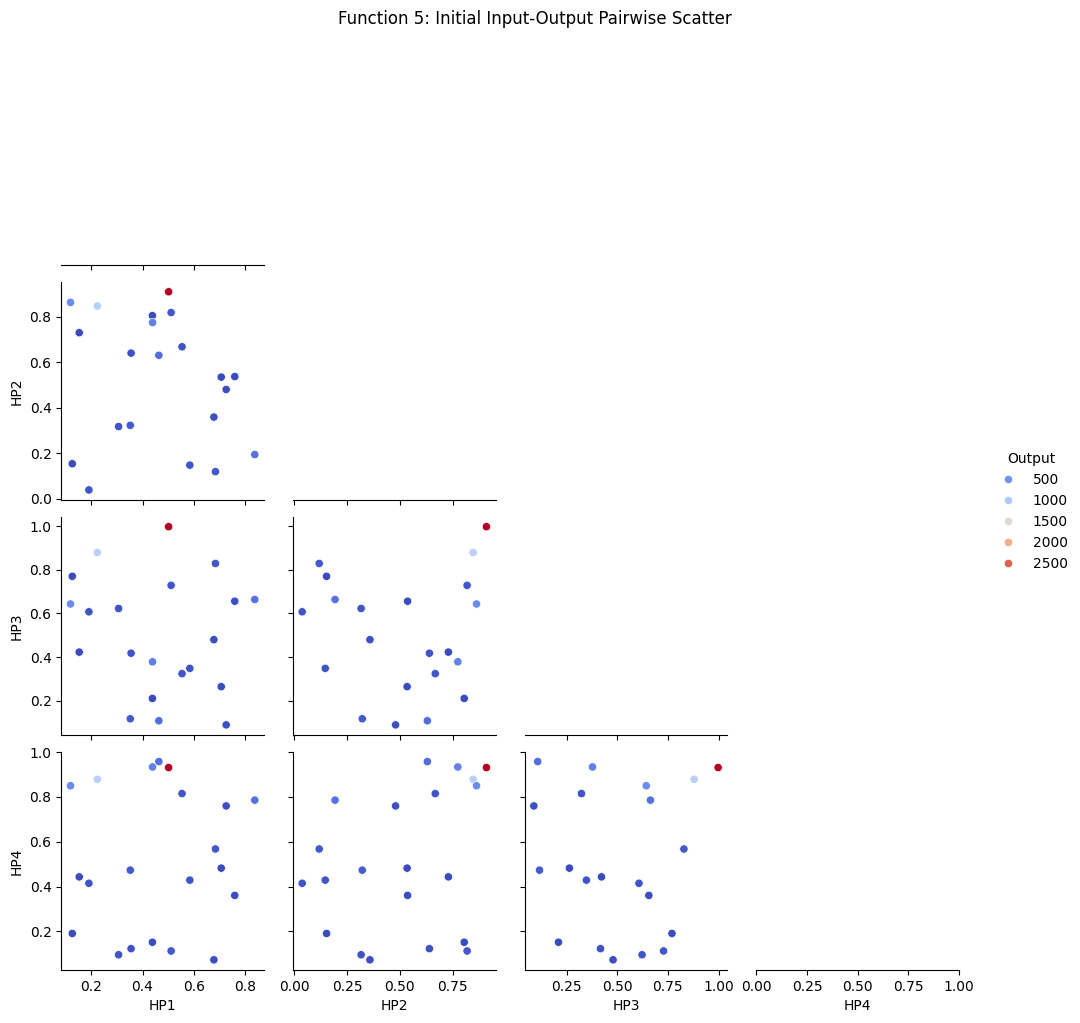

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1b. Pairwise scatter plots
df = pd.DataFrame(inputs_f5, columns=['HP1','HP2','HP3','HP4'])
df['Output'] = outputs_f5

sns.pairplot(df, hue='Output', palette='coolwarm', corner=True)
plt.suptitle('Function 5: Initial Input-Output Pairwise Scatter', y=1.02)
plt.show()

Fit the gaussian process

In [10]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

# 2a. Kernel: smooth + noise
kernel = 1.0 * RBF(length_scale=0.2, length_scale_bounds=(1e-2,1.0)) \
         + WhiteKernel(noise_level=1e-2, noise_level_bounds=(1e-6,1e0))

In [11]:
# 2b. Fit GP
gp_f5 = GaussianProcessRegressor(
    kernel=kernel,
    normalize_y=True,
    n_restarts_optimizer=10,
    random_state=42
)

gp_f5.fit(inputs_f5, outputs_f5)
print("Optimized kernel:", gp_f5.kernel_)

Optimized kernel: 1.75**2 * RBF(length_scale=0.585) + WhiteKernel(noise_level=1.9e-06)


Step 3: Suggest the next point using UCB

Goal: maximize output (less negative)

In [12]:
# Sample candidate points in 4D space
num_candidates = 5000
X_candidates = np.random.rand(num_candidates, 4)

# GP prediction: mean and std
mu, sigma = gp_f5.predict(X_candidates, return_std=True)

# UCB acquisition
kappa = 5  # exploration/exploitation trade-off -- keeping the high value as aim is explore mor
UCB = mu + kappa * sigma

# Next suggested point
idx_next = np.argmax(UCB)
x_next = X_candidates[idx_next]

print("Next input combination suggested by BO:", x_next)

Next input combination suggested by BO: [0.98878117 0.9418805  0.90217085 0.86206422]


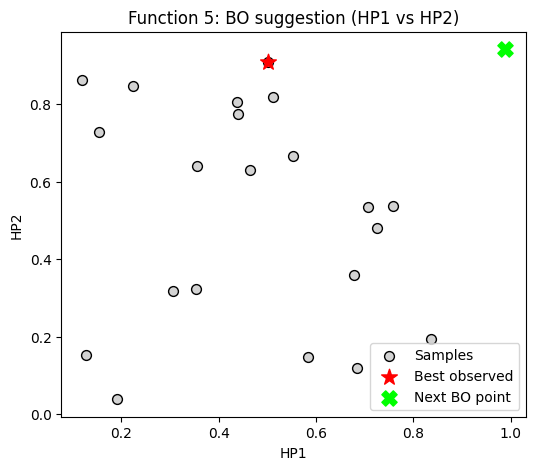

In [13]:
import matplotlib.pyplot as plt

# Example: HP1 vs HP2
plt.figure(figsize=(6,5))
plt.scatter(inputs_f5[:,0], inputs_f5[:,1], c='lightgray', s=50, edgecolors='black', label='Samples')
plt.scatter(x_best[0], x_best[1], c='red', s=140, marker='*', label='Best observed')
plt.scatter(x_next[0], x_next[1], c='lime', s=120, marker='X', label='Next BO point')
plt.xlabel('HP1')
plt.ylabel('HP2')
plt.title('Function 5: BO suggestion (HP1 vs HP2)')
plt.legend()
plt.show()